## 1. Import Modules & Dataset

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
data_df = pd.read_csv("keystats.csv", index_col="Date")
data_df.dropna(axis=0, how="any", inplace=True)

features = data_df.columns[6:]
data_features = data_df[features]
X = data_df[features].values

## 2. PCA & 2D Chart

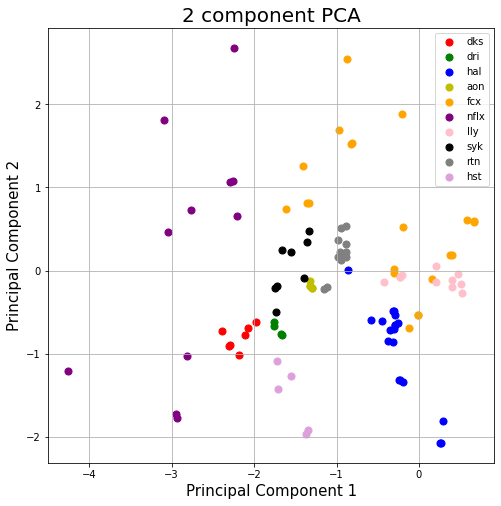

In [6]:
# Normalizing features
data_features_N = (data_features - data_features.mean()) / data_features.std()

X = data_features_N.values
pca = PCA(n_components=2) # Choose 2 components is to plot the scatterplot
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
features_tickers = data_df["Ticker"].values
principalDf['Ticker']=features_tickers

#Plot the stocks
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = set(features_tickers) # Tickers 
colors = ['r', 'g', 'b', 'y', 'orange', 'purple', 'pink', 'black', 'grey','plum']
for ticker, color in zip(targets,colors):
    indicesToKeep = principalDf['Ticker'] == ticker 
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()  # Random pick of the tickers

## 3. Input your stock tickers in the "targets" line

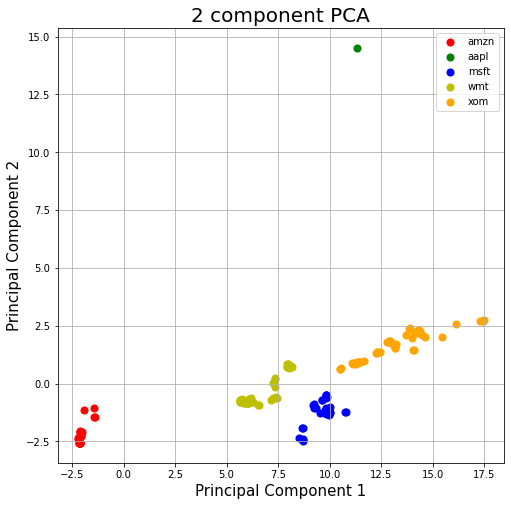

In [7]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['amzn','aapl', 'msft','wmt','xom']  # Use any tickers you like
colors = ['r', 'g', 'b','y','orange','purple']
for ticker, color in zip(targets,colors):
    indicesToKeep = principalDf['Ticker'] == ticker
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## 4. What features most correlated to principle components?

In [8]:
corr = pd.concat([principalDf,data_features_N.reset_index()],axis=1).corr()
corr.iloc[0].sort_values(ascending = False).head(10) # The Principal component 1's correlations of the features

principal component 1       1.000000
Operating Cash Flow         0.944382
EBITDA                      0.933497
Market Cap                  0.925907
Net Income Avl to Common    0.920095
Gross Profit                0.906682
Enterprise Value            0.905245
Shares Outstanding          0.881926
Float                       0.872669
Revenue                     0.791920
Name: principal component 1, dtype: float64

In [9]:
corr.iloc[1].sort_values(ascending = False).head(10) # The Principal component 2's correlations of the features

principal component 2     1.000000
200-Day Moving Average    0.916712
50-Day Moving Average     0.908884
Diluted EPS               0.883958
Total Cash Per Share      0.718690
Book Value Per Share      0.716388
Revenue Per Share         0.351680
Operating Margin          0.302919
Profit Margin             0.229497
Price/Sales               0.221073
Name: principal component 2, dtype: float64

## 5. PCA Correlation Heatmap

In [11]:
plt.rcParams['figure.figsize'] = [12, 8]

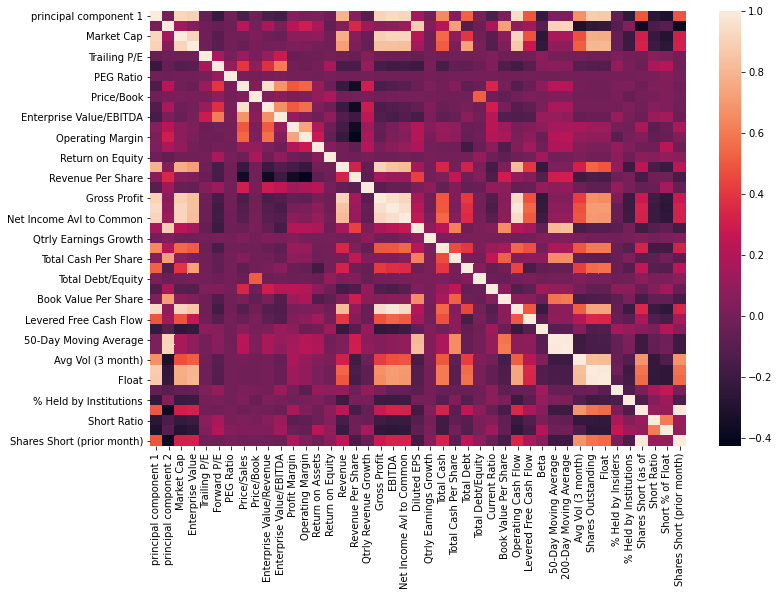

In [13]:
sns.heatmap(pd.concat([principalDf,data_features_N.reset_index()],axis=1).corr());